In [1]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch

CPython 3.6.10
IPython 7.13.0

numpy 1.18.2
pandas 1.0.3
torch 1.4.0


In [2]:
%watermark

2020-08-22T22:49:12+05:30

CPython 3.6.10
IPython 7.13.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
CPU cores  : 24
interpreter: 64bit


In [3]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
#rom sklearn.preprocessing import MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
import glob

In [5]:
#load the data
covid = pd.read_csv(r"C:\Users\truppy\Desktop\COVID-19-master\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv")

In [6]:
covid.head(50)

Province/State          Country/Region        Lat  \
0                            NaN             Afghanistan  33.939110   
1                            NaN                 Albania  41.153300   
2                            NaN                 Algeria  28.033900   
3                            NaN                 Andorra  42.506300   
4                            NaN                  Angola -11.202700   
5                            NaN     Antigua and Barbuda  17.060800   
6                            NaN               Argentina -38.416100   
7                            NaN                 Armenia  40.069100   
8   Australian Capital Territory               Australia -35.473500   
9                New South Wales               Australia -33.868800   
10            Northern Territory               Australia -12.463400   
11                    Queensland               Australia -27.469800   
12               South Australia               Australia -34.928500   
13                      Tasmania               Australia -42.882100   
14                      Victoria               Australia -37.813600   
15             Western Australia               Australia -31.950500   
16                           NaN                 Austria  47.516200   
17                           NaN              Azerbaijan  40.143100   
18                           NaN                 Bahamas  25.025885   
19                           NaN                 Bahrain  26.027500   
20                           NaN              Bangladesh  23.685000   
21                           NaN                Barbados  13.193900   
22                           NaN                 Belarus  53.709800   
23                           NaN                 Belgium  50.833300   
24                           NaN                  Belize  17.189900   
25                           NaN                   Benin   9.307700   
26                           NaN                  Bhutan  27.514200   
27                           NaN                 Bolivia -16.290200   
28                           NaN  Bosnia and Herzegovina  43.915900   
29                           NaN                Botswana -22.328500   
30                           NaN                  Brazil -14.235000   
31                           NaN                  Brunei   4.535300   
32                           NaN                Bulgaria  42.733900   
33                           NaN            Burkina Faso  12.238300   
34                           NaN                   Burma  21.916200   
35                           NaN                 Burundi  -3.373100   
36                           NaN              Cabo Verde  16.538800   
37                           NaN                Cambodia  11.550000   
38                           NaN                Cameroon   3.848000   
39                       Alberta                  Canada  53.933300   
40              British Columbia                  Canada  53.726700   
41              Diamond Princess                  Canada   0.000000   
42                Grand Princess                  Canada   0.000000   
43                      Manitoba                  Canada  53.760900   
44                 New Brunswick                  Canada  46.565300   
45     Newfoundland and Labrador                  Canada  53.135500   
46         Northwest Territories                  Canada  64.825500   
47                   Nova Scotia                  Canada  44.682000   
48                       Ontario                  Canada  51.253800   
49          Prince Edward Island                  Canada  46.510700   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
0    67.709953        0        0        0        0        0        0  ...   
1    20.168300        0        0        0        0        0        0  ...   
2     1.659600        0        0        0        0        0        0  ...   
3     1.521800        0        0        0        0        0        0  ...   
4    17.873

In [7]:
covid = covid.iloc[:, 4:]

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
covid.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
0        0        0       0       0       0       0       0       0       0   
1        0        0       0       0       0       0       0       0       0   
2        0        0       0       0       0       0       0       0       0   
3        0        0       0       0       0       0       0       0       0   
4        0        0       0       0       0       0       0       0       0   

   2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
0        1        1        1        1        1        1       1       1   
1        0        0        0        0        0        0       0       0   
2        0        1        1        1        1        1       1       3   
3        0        0        0        0        0        0       0       1   
4        0        0        0        0        0        0       0       0   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
0       1       1       1       1       1       4       4        5        7   
1       0       0       0       0       0       0       2       10       12   
2       5      12      12      17      17      19      20       20       20   
3       1       1       1       1       1       1       1        1        1   
4       0       0       0       0       0       0       0        0        0   

   3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
0        7        7       11       16       21       22       22       22   
1       23       33       38       42       51       55       59       64   
2       24       26       37       48       54       60       74       87   
3        1        1        1        1        2       39       39       53   
4        0        0        0        0        0        0        0        0   

   3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
0       24       24       40       40       74       84       94      110   
1       70       76       89      104      123      146      174      186   
2       90      139      201      230      264      302      367      409   
3       75       88      113      133      164      188      224      267   
4        1        2        2        3        3        3        4        4   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0      110      120      170      174     237     273     281     299     349   
1      197      212      223      243     259     277     304     333     361   
2      454      511      584      716     847     986   

In [10]:
covid.shape

(266, 212)

In [11]:
covid.isnull().sum().sum()

0

In [12]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 212 entries, 1/22/20 to 8/20/20
dtypes: int64(212)
memory usage: 440.7 KB


In [13]:
covid.isnull().sum()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
8/16/20    0
8/17/20    0
8/18/20    0
8/19/20    0
8/20/20    0
Length: 212, dtype: int64

In [14]:
covid.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/11/20', '8/12/20', '8/13/20', '8/14/20', '8/15/20', '8/16/20',
       '8/17/20', '8/18/20', '8/19/20', '8/20/20'],
      dtype='object', length=212)

In [15]:
import matplotlib.pyplot as plt

def plot_corr(df,size=200):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = covid.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(covid)

No handles with labels found to put in legend.


#looks like my kernel is going to die

In [16]:
#find daily cases
daily_cases = covid.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head(500)

2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-08-16    21672186
2020-08-17    21881858
2020-08-18    22136954
2020-08-19    22411300
2020-08-20    22678483
Length: 212, dtype: int64

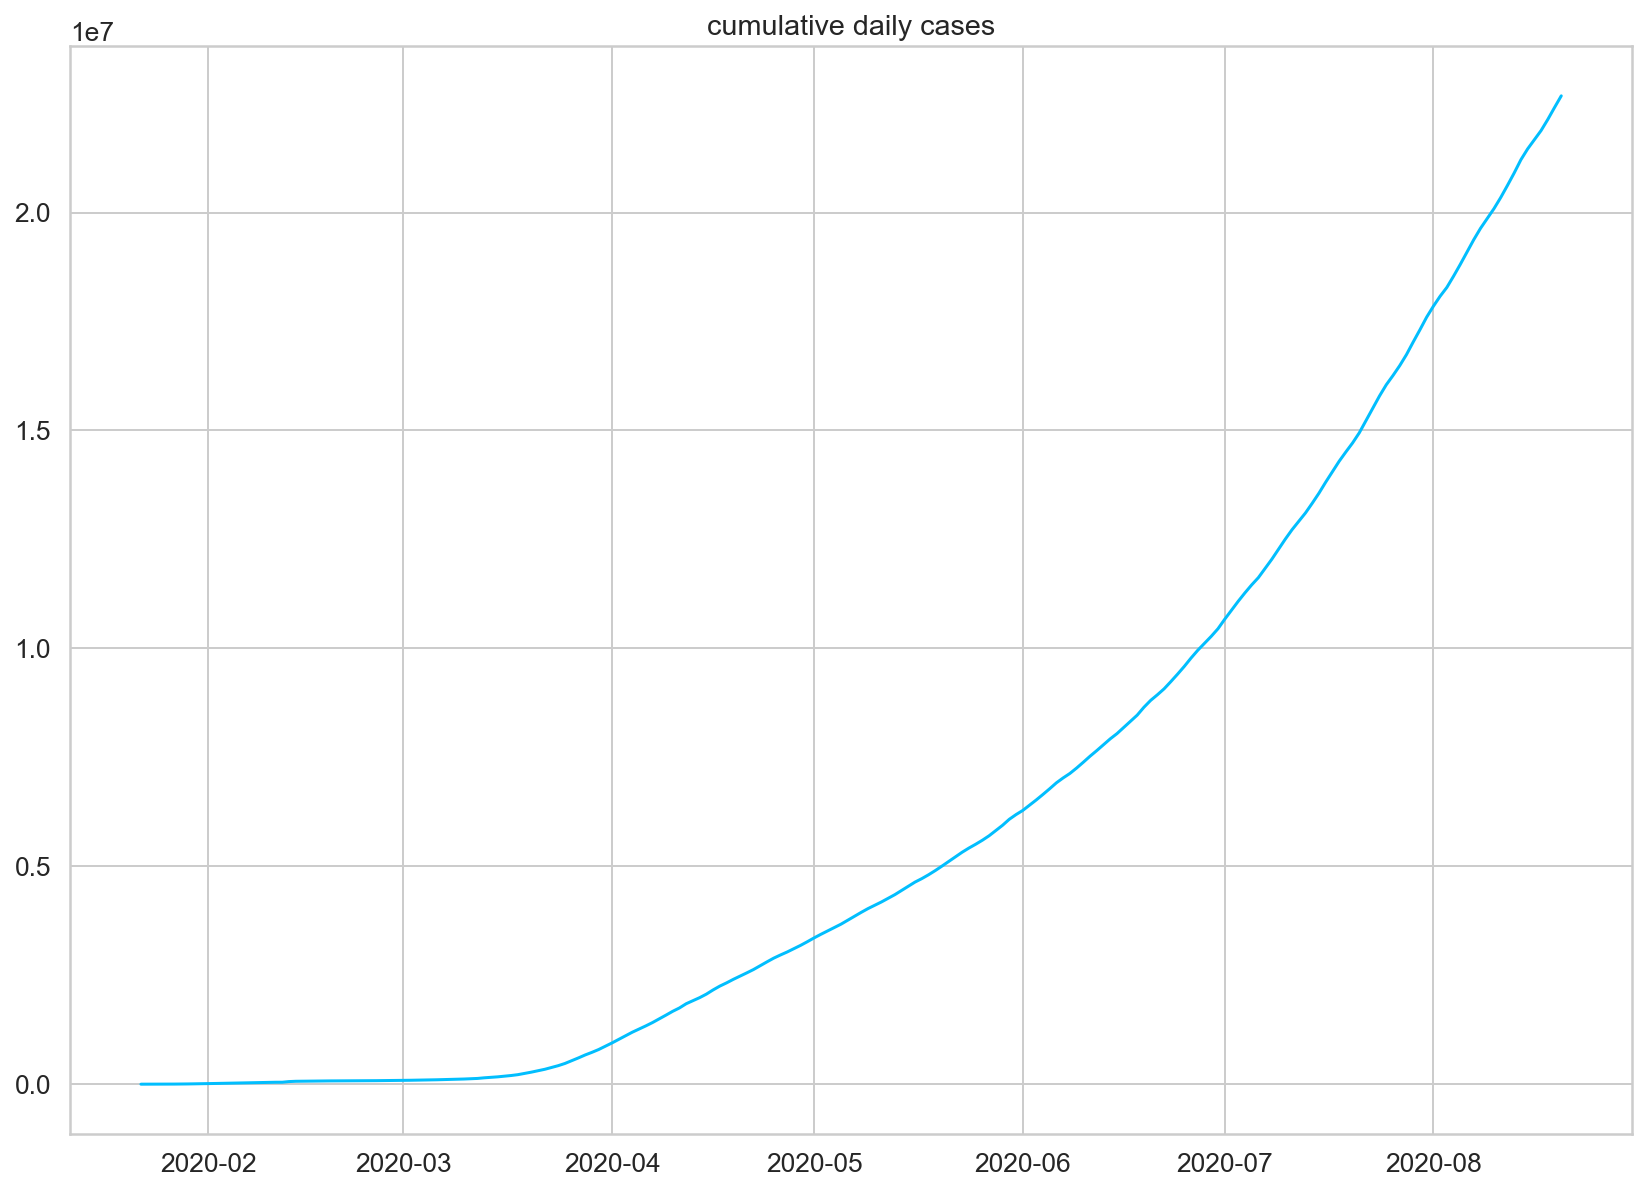

In [17]:
plt.plot(daily_cases)
plt.title("cumulative daily cases");

In [18]:
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.head()

2020-01-22    555
2020-01-23     99
2020-01-24    287
2020-01-25    493
2020-01-26    684
dtype: int64

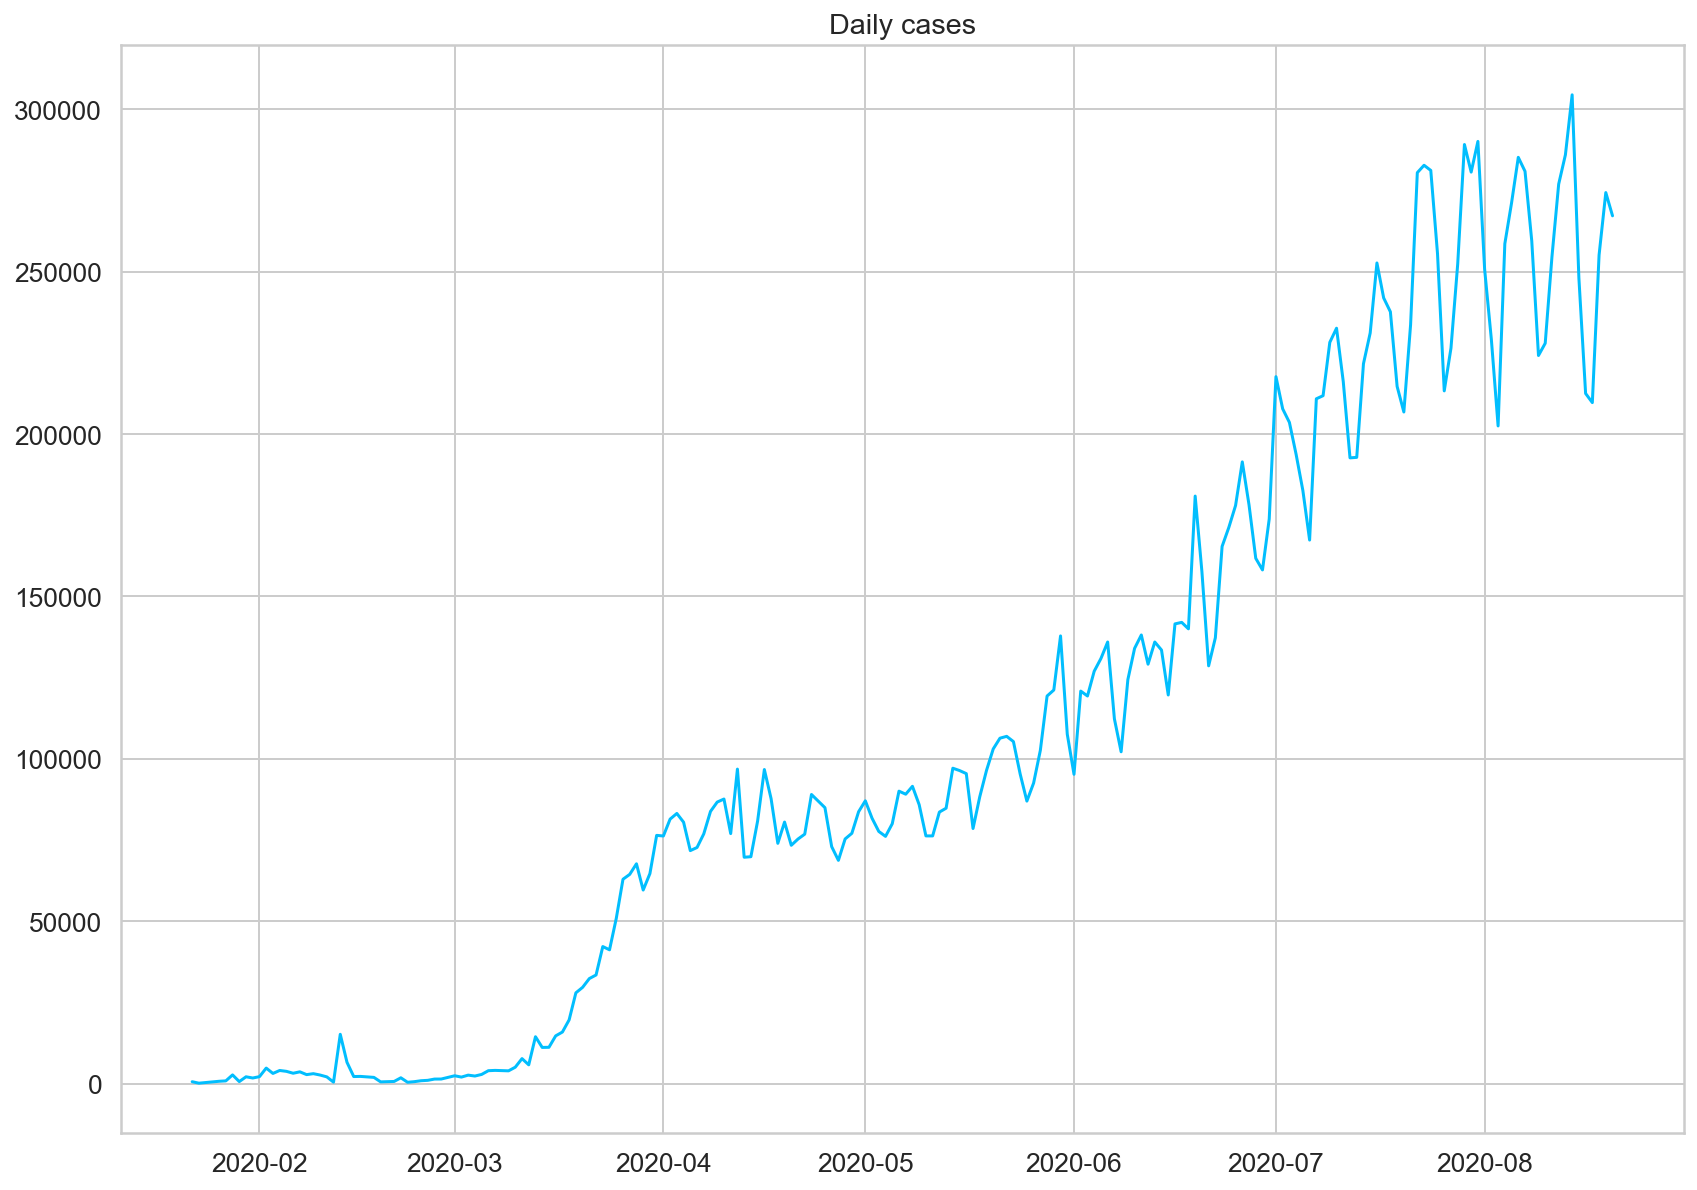

In [19]:
plt.plot(daily_cases)
plt.title("Daily cases");

In [20]:
daily_cases.shape

(212,)

In [21]:
test_data_size = 45
train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]

train_data.shape

(167,)

We have to scale the data (values will be between 0 and 1) if we want to increase the training speed and performance of the model. We'll use the MinMaxScaler from scikit-learn:

In [22]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

In [23]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [24]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

Each training example contains a sequence of 5 data points of history and a label for the real value that our model needs to predict. Let's dive in:

In [25]:
X_train.shape

torch.Size([161, 5, 1])

In [26]:
X_train[:2]

tensor([[[0.0021],
         [0.0000],
         [0.0009],
         [0.0018],
         [0.0027]],

        [[0.0000],
         [0.0009],
         [0.0018],
         [0.0027],
         [0.0033]]])

In [27]:
y_train.shape

torch.Size([161, 1])

In [28]:
y_train[:2]

tensor([[0.0033],
        [0.0117]])

In [29]:
train_data[:10]

array([[0.00209601],
       [0.        ],
       [0.00086415],
       [0.00181103],
       [0.00268896],
       [0.00326353],
       [0.01173031],
       [0.0022477 ],
       [0.00905054],
       [0.00732685]])

In [30]:
#building a model

In [31]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

Our CoronaVirusPredictor contains 3 methods:

constructor - initialize all helper data and create the layers
reset_hidden_state - we'll use a stateless LSTM, so we need to reset the state after each example
forward - get the sequences, pass all of them through the LSTM layer, at once. We take the output of the last time step and pass it through our linear layer to get the prediction.

In [45]:
def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 100

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

Note that the hidden state is reset at the start of each epoch. We don't use batches of data our model sees every example at once. We'll use mean squared error to measure our training and test error. We'll record both.

Let's create an instance of our model and train it:

In [46]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 26.300012588500977 test loss: 49.81098556518555
Epoch 10 train loss: 11.685755729675293 test loss: 29.723506927490234
Epoch 20 train loss: 9.813301086425781 test loss: 22.034833908081055
Epoch 30 train loss: 2.001882791519165 test loss: 612.0040283203125
Epoch 40 train loss: 20.5377254486084 test loss: 19.685588836669922
Epoch 50 train loss: 12.471138954162598 test loss: 33.67974853515625
Epoch 60 train loss: 11.74516773223877 test loss: 25.995256423950195
Epoch 70 train loss: 11.43722152709961 test loss: 28.595735549926758
Epoch 80 train loss: 11.174040794372559 test loss: 28.137439727783203
Epoch 90 train loss: 11.305439949035645 test loss: 26.74441909790039


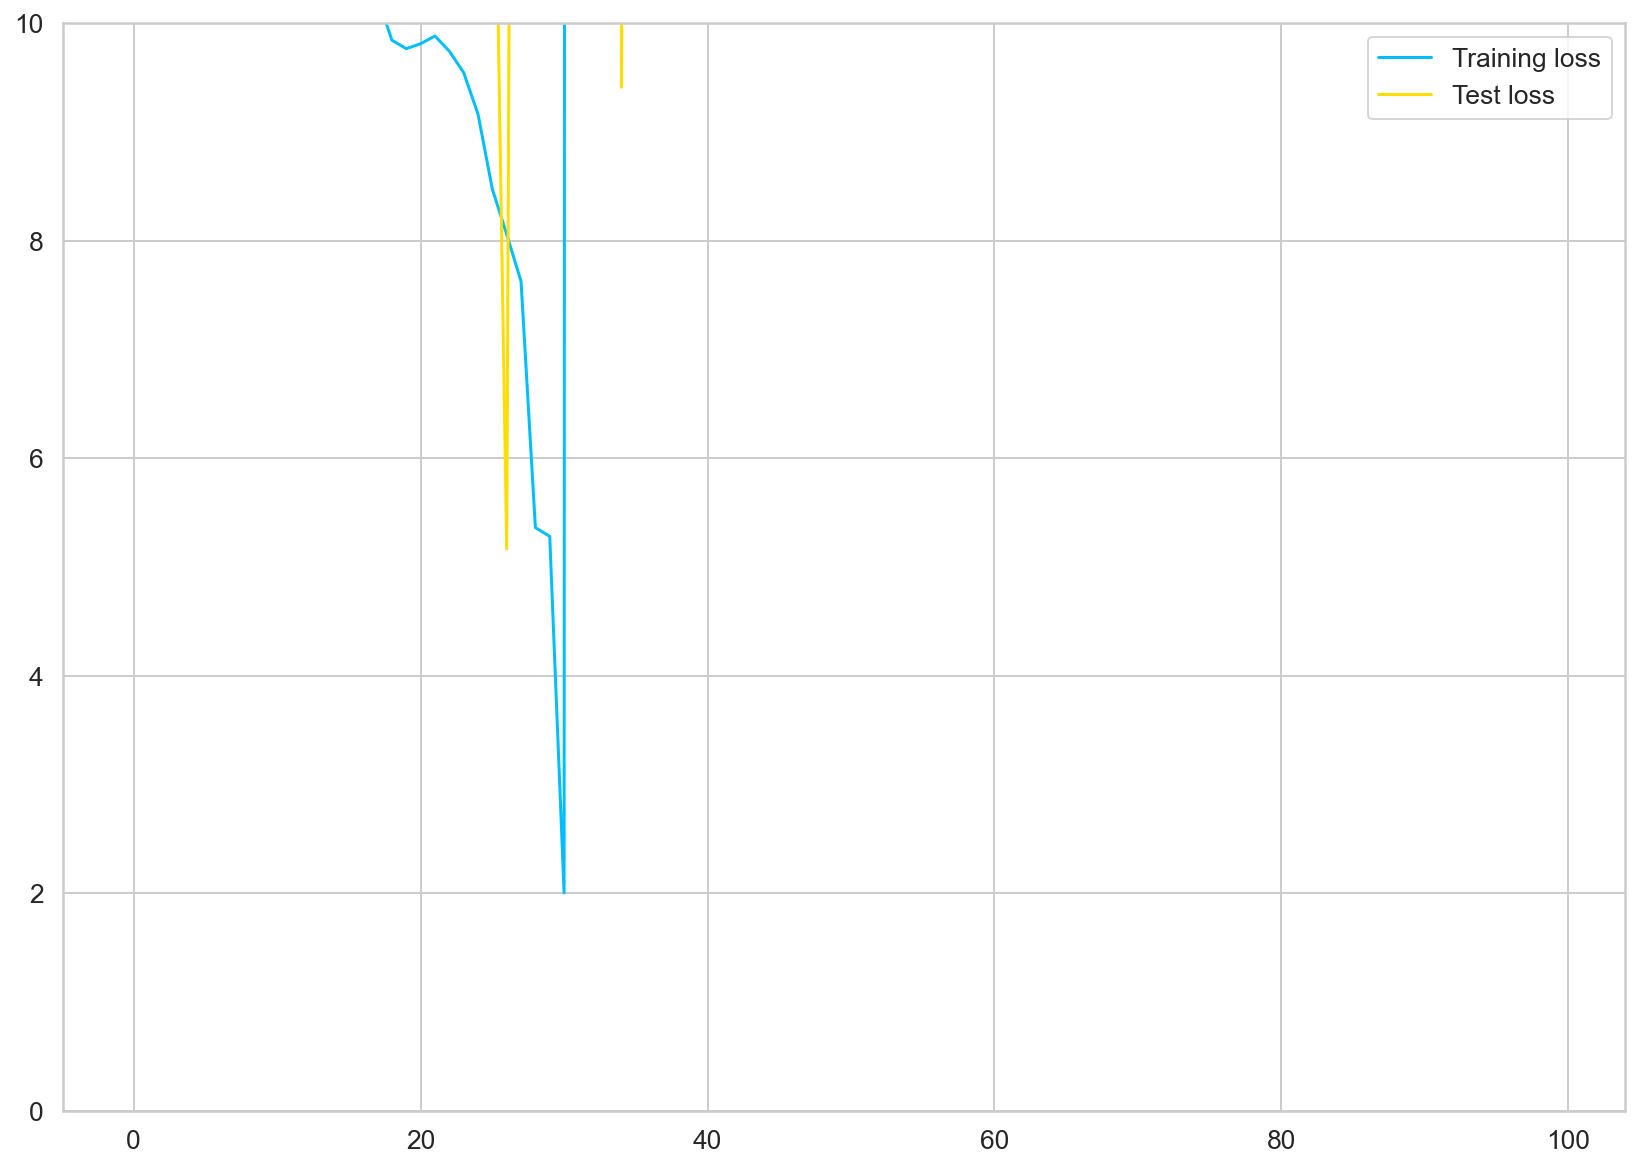

In [47]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 10))
plt.legend();

In [48]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [49]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

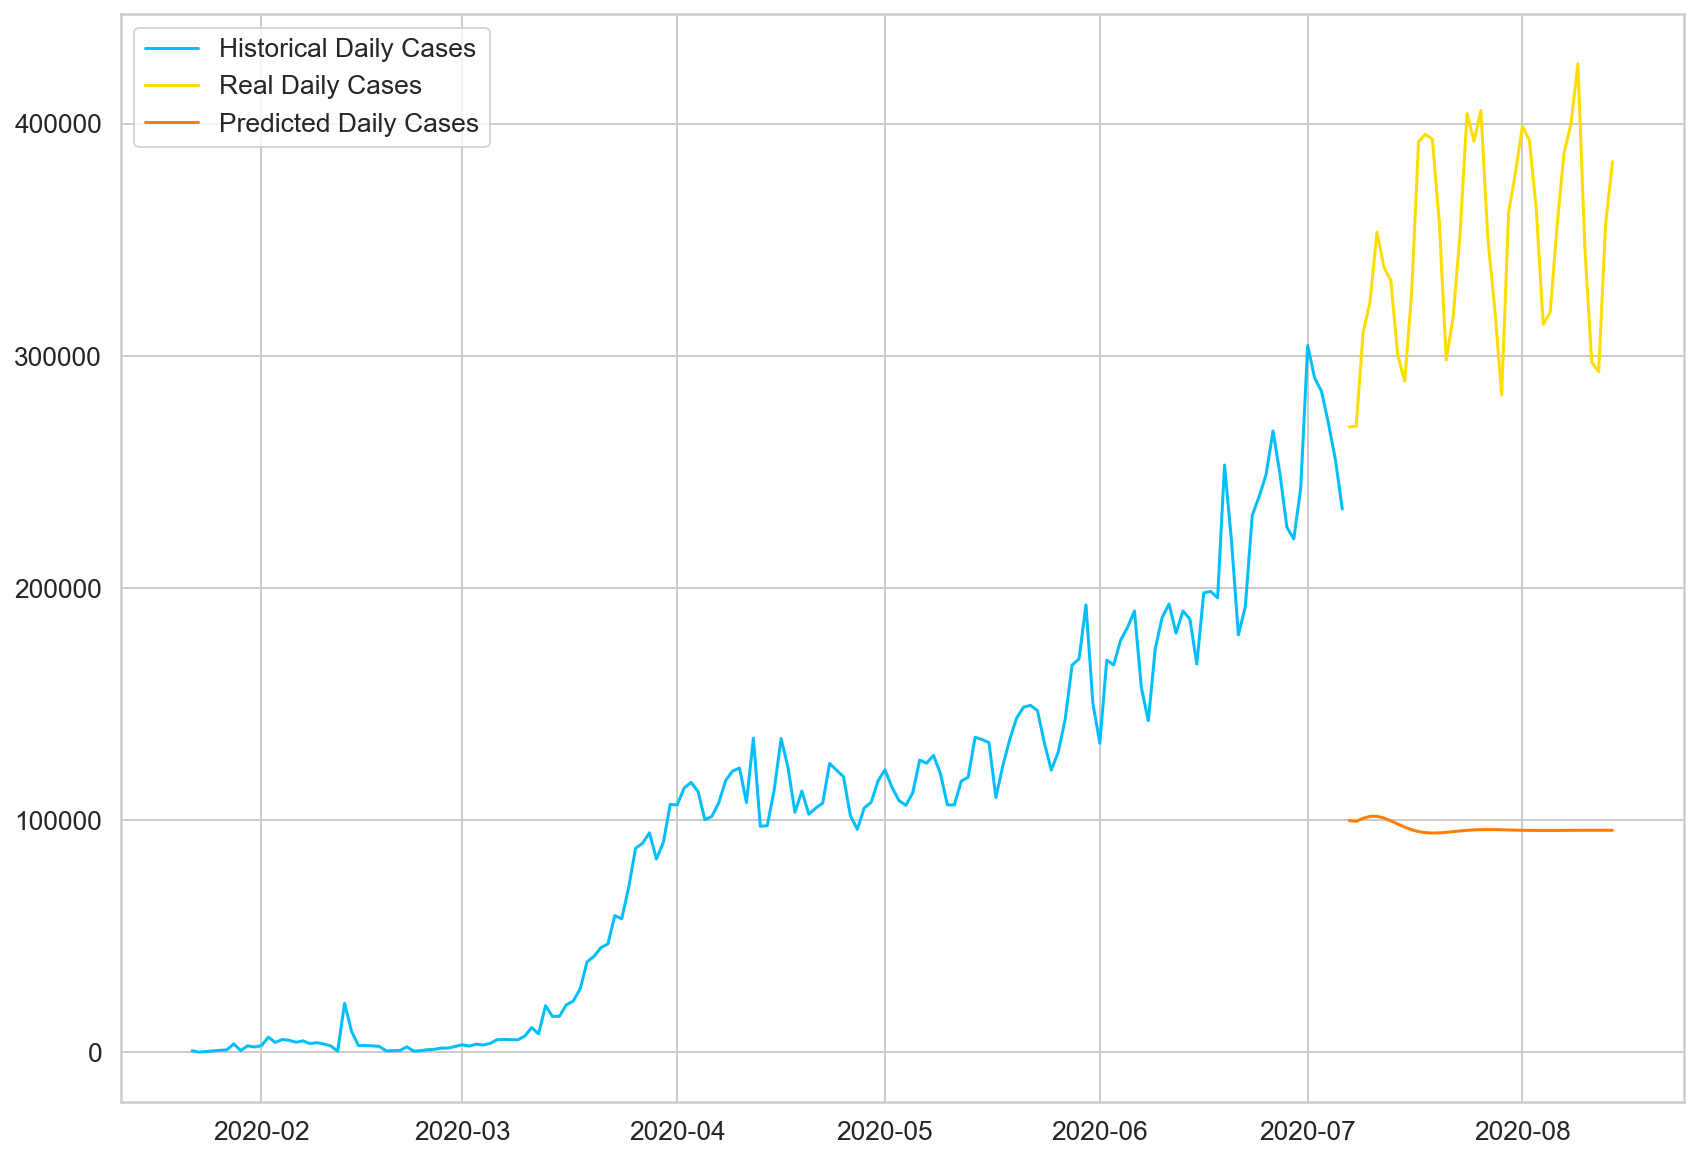

In [50]:
plt.plot(
  daily_cases.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [51]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(daily_cases, axis=1))

all_data = scaler.transform(np.expand_dims(daily_cases, axis=1))

all_data.shape

(212, 1)

In [52]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 34.68423080444336
Epoch 10 train loss: 15.46919059753418
Epoch 20 train loss: 11.00967788696289
Epoch 30 train loss: 9.875619888305664
Epoch 40 train loss: 7.7020583152771
Epoch 50 train loss: 8.160650253295898
Epoch 60 train loss: 7.739299297332764
Epoch 70 train loss: 5.634881019592285
Epoch 80 train loss: 1.5241867303848267
Epoch 90 train loss: 1.525019884109497


In [53]:
DAYS_TO_PREDICT = 12

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [54]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

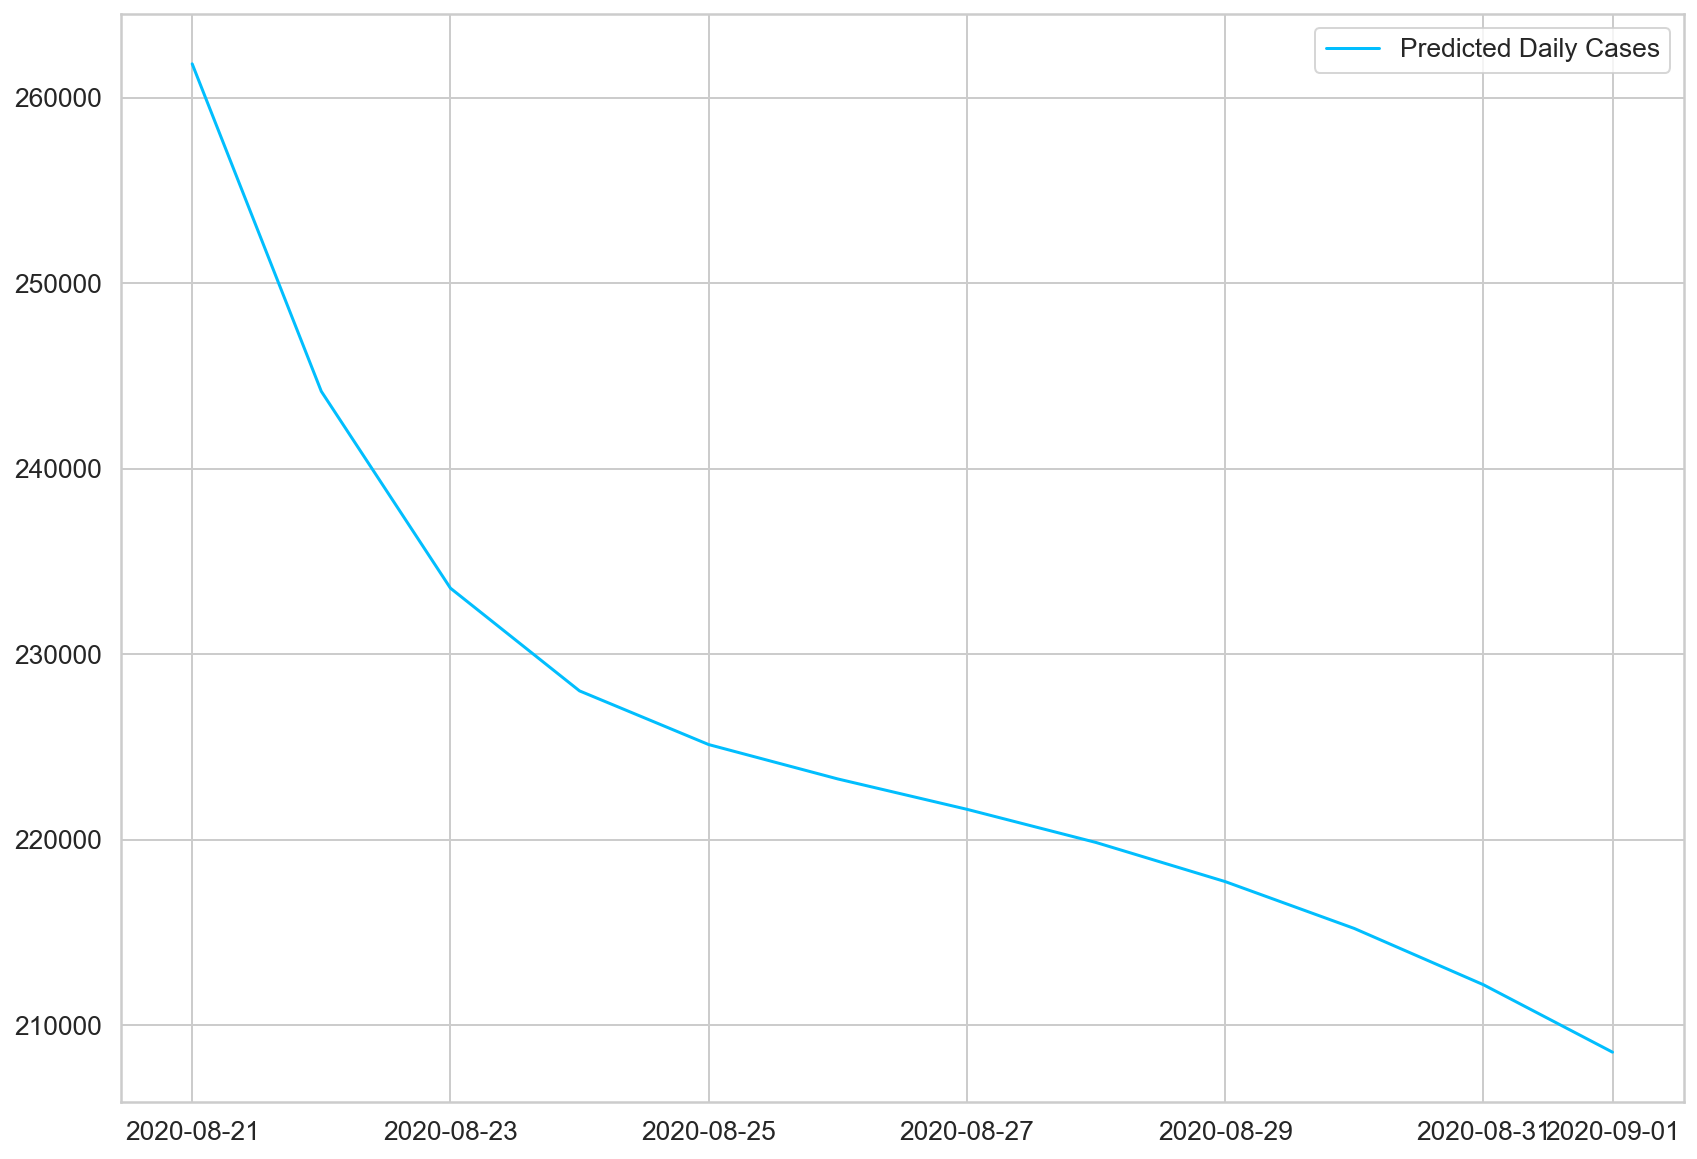

In [55]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

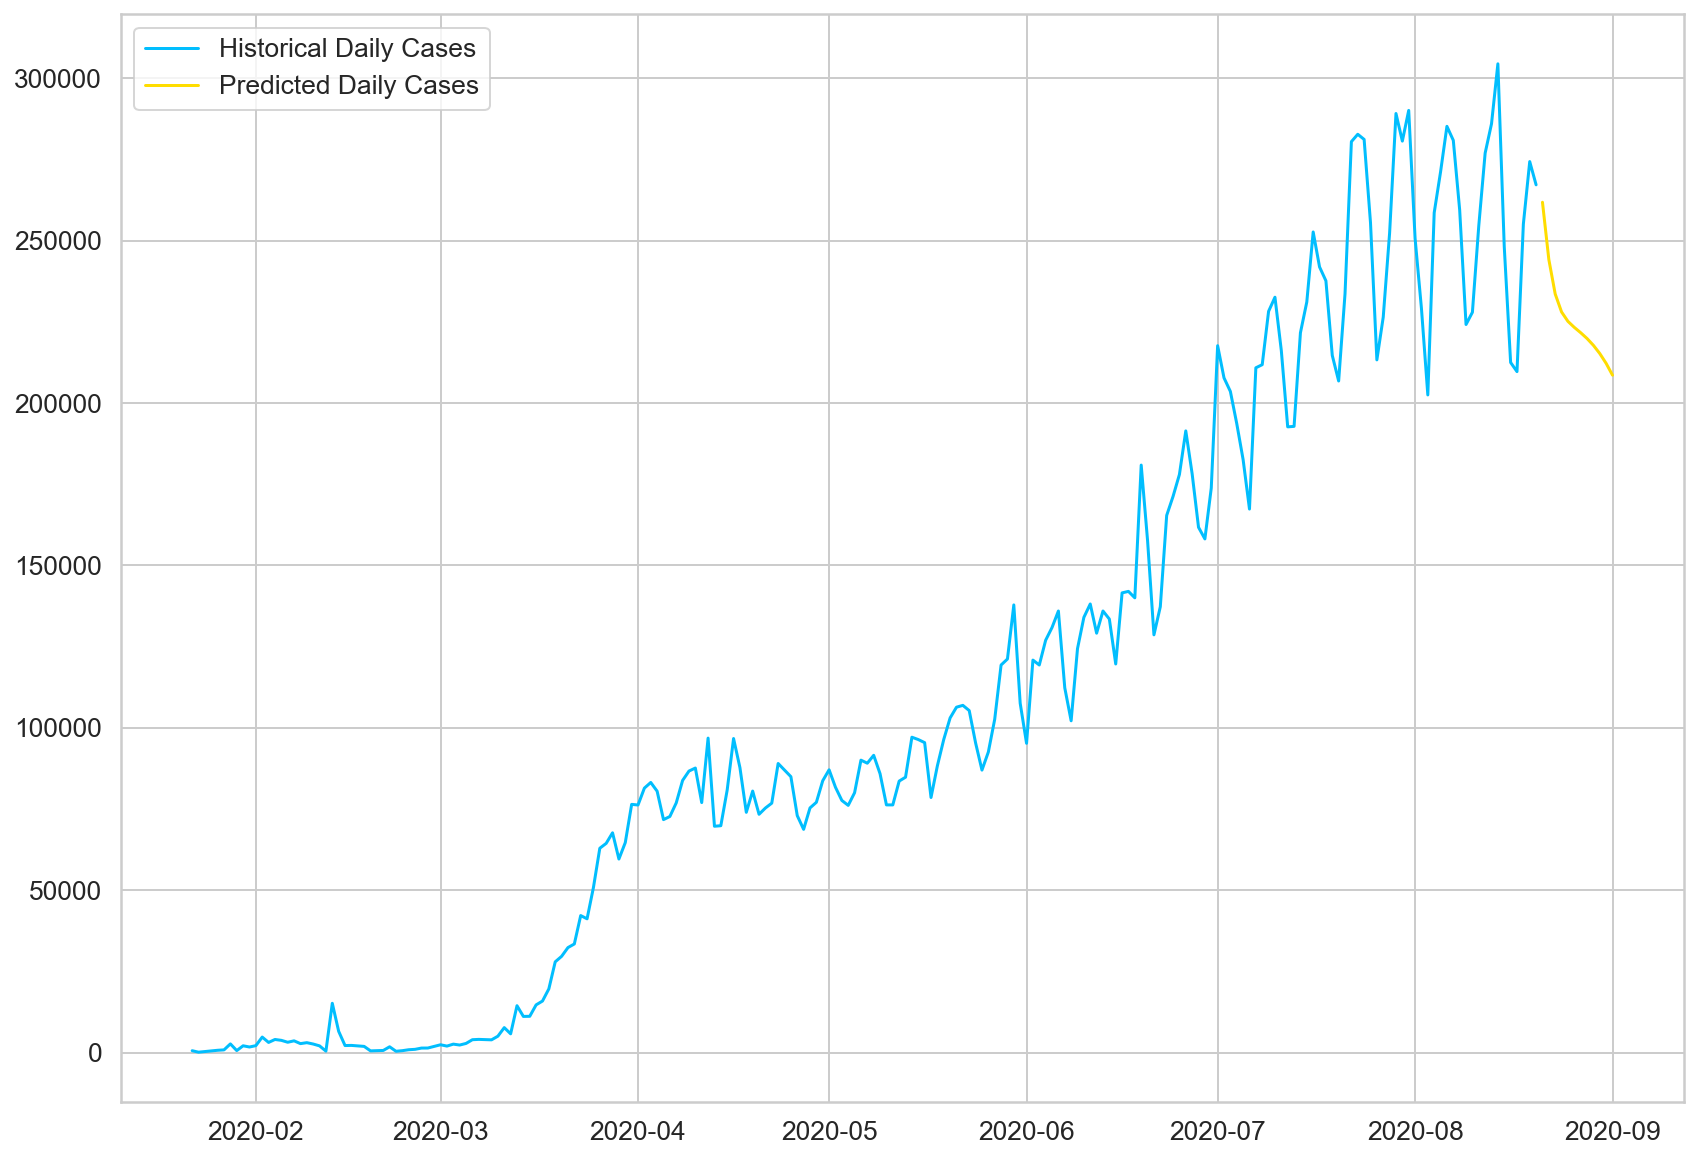

In [56]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();